In [2]:
# !pip install librosa

In [1]:
import librosa
import librosa.display as dsp
from IPython.display import Audio
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import LabelBinarizer

In [2]:
def get_audio(digit):
    
    # Audio Sample Directory
    sam = np.random.randint(1,60)
    # Index of Audio
    ind = np.random.randint(1,5)
    
    # Modified file location
    if sam<10:
        file = f"/Users/simrankodwani/Downloads/data/0{sam}/{digit}_0{sam}_{ind}.wav"
    else:
        file = f"/Users/simrankodwani/Downloads/data/{sam}/{digit}_{sam}_{ind}.wav"

    
    # Get Audio from the location
    data, sample_rate = librosa.load(file)
    
    # Plot the audio wave
    dsp.waveshow(data,sr=sample_rate, color='red')
    plt.title('Wavelet for the digit '+str(digit))
    plt.show()
    
    # Show the widget
    return Audio(data=data,rate=sample_rate)

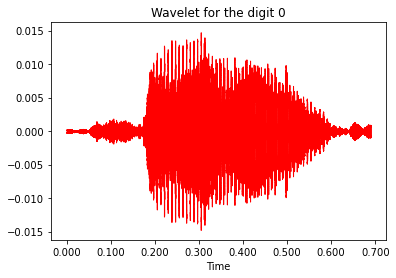

In [3]:
get_audio(0)

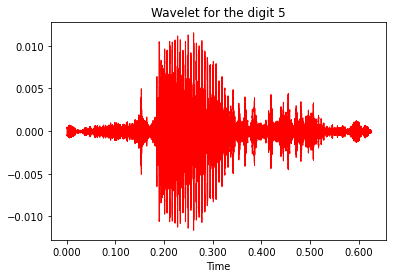

In [4]:
get_audio(5)

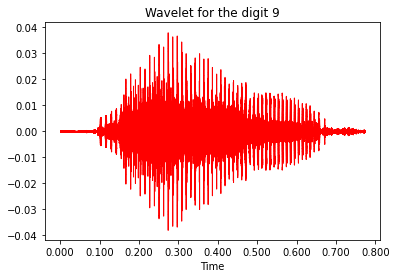

In [5]:
get_audio(9)

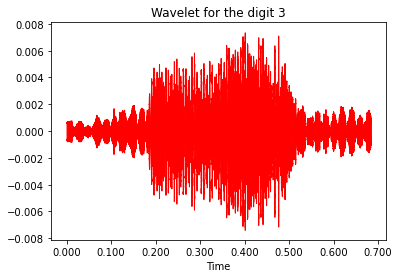

In [6]:
get_audio(3)

In [7]:
# A function which return audio file for a mentioned digit

def get_audio_raw(digit=0):
    # Audio Sample Directory
    sample = np.random.randint(1,60)
    # Index of Audio
    index = np.random.randint(1,5)
    
    # Modified file location
    if sample<10:
        file = f"/Users/simrankodwani/Downloads/data/0{sample}/{digit}_0{sample}_{index}.wav"
    else:
        file = f"/Users/simrankodwani/Downloads/data/{sample}/{digit}_{sample}_{index}.wav"

    
    # Get Audio from the location
    data,sample_rate = librosa.load(file)

    # Return audio
    return data,sample_rate

In [8]:
def spectogram_of(digit):
    # Reading the audio file
    data, sr = get_audio_raw(digit)a
    
    # Applying Short-Time-Fourier-Transformer to transform data
    D = librosa.stft(data)
    
    # Converting frequency to decible
    S_db = librosa.amplitude_to_db(np.abs(D),ref=np.max)
    
    # Plot the transformed data
    librosa.display.specshow(S_db,x_axis='time',y_axis='log')
    plt.show();

In [9]:
from matplotlib import cm

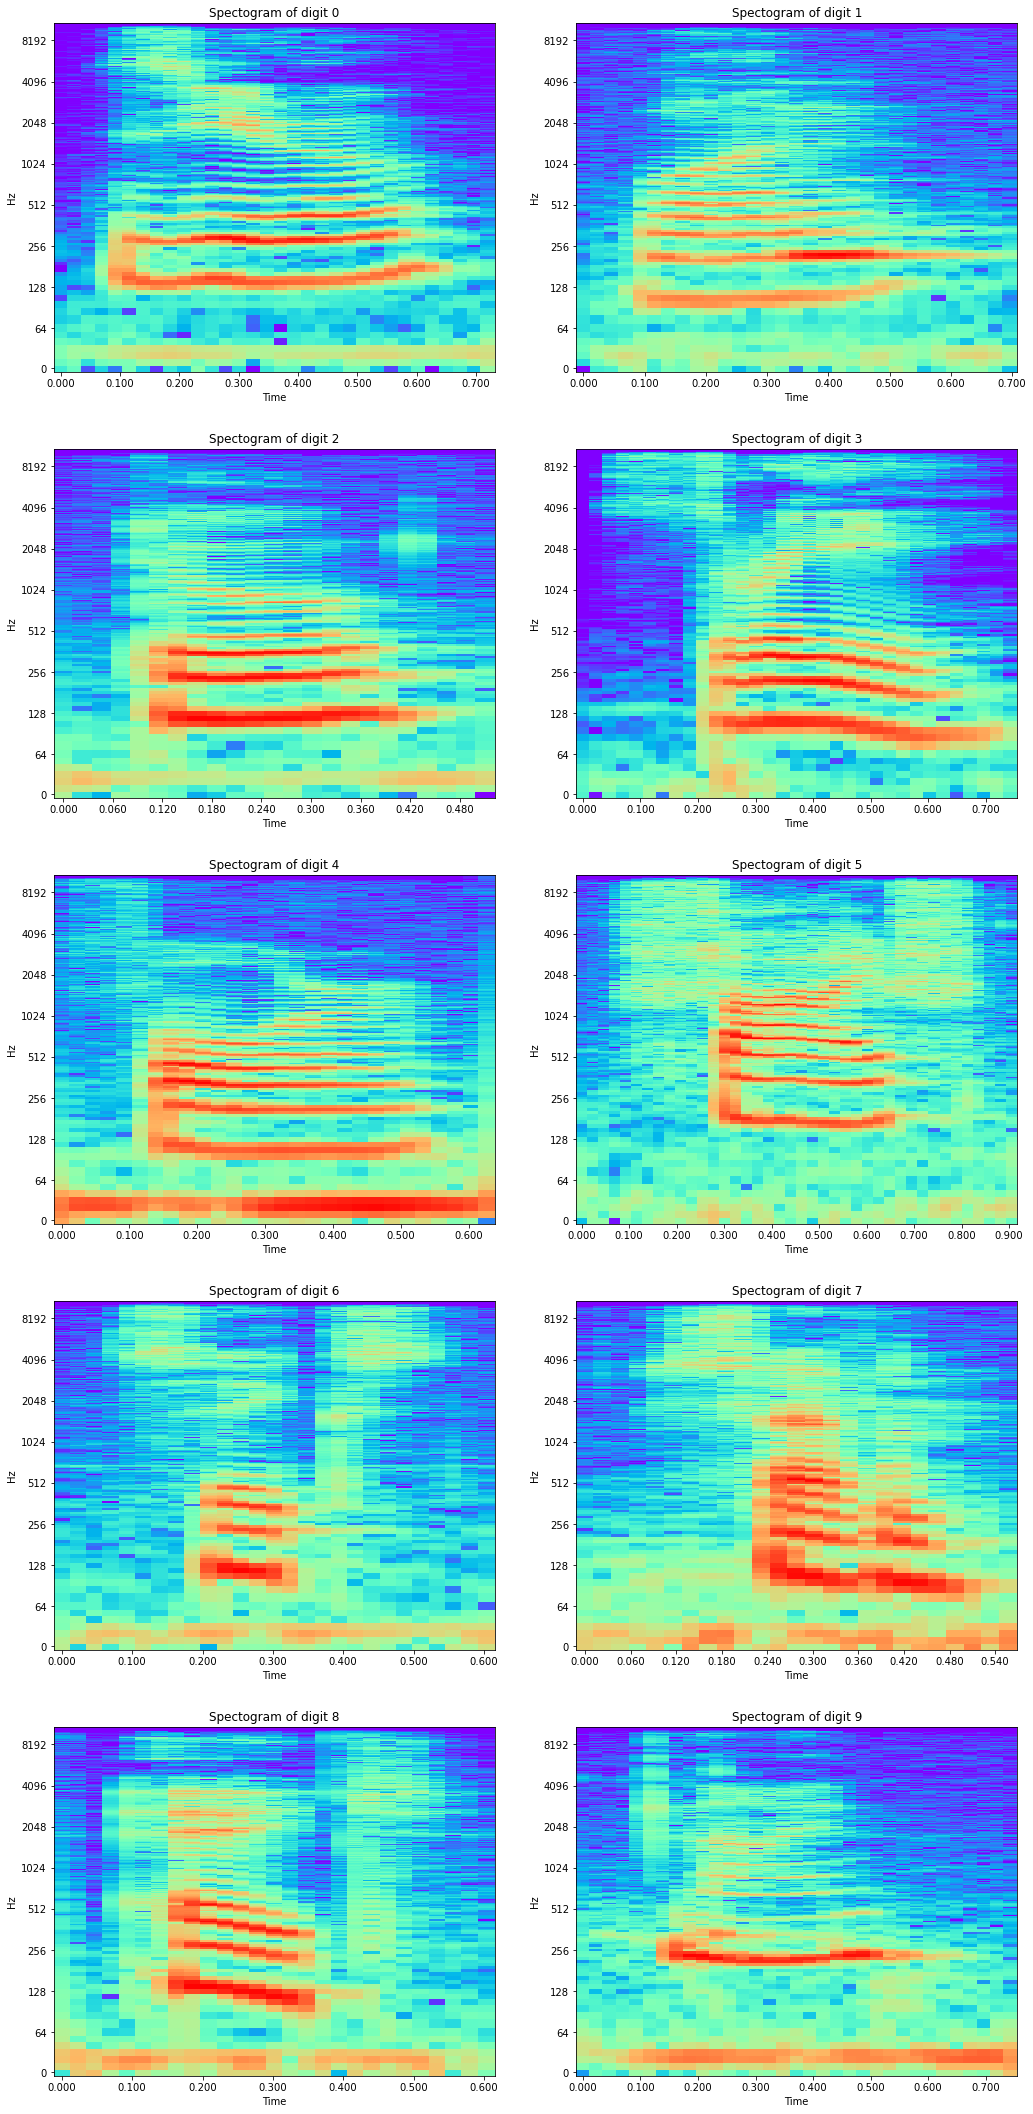

In [10]:
# Creating subplots
fig,ax = plt.subplots(5,2,figsize=(15,30))

# Initializing row and column variables for subplots
row = 0
column = 0

for digit in range(10):  
    # Read the audio file
    data,sr = get_audio_raw(digit)
    
    # Apply Short-Time-Fourier-Transformer to transform data
    D = librosa.stft(data)
    
    # Converting frequency to decible
    S_db = librosa.amplitude_to_db(np.abs(D),ref=np.max)
    
    # Plot the transformed data
    ax[row,column].set_title(f"Spectogram of digit {digit}")
    librosa.display.specshow(S_db,x_axis='time',y_axis='log',ax=ax[row,column],cmap=cm.rainbow)
    
    # Conditions for positioning of the plots
    if column == 1:
        column = 0
        row += 1
    else:
        column+=1
        
    
plt.tight_layout(pad=3)
plt.show();

In [11]:
# will take a audio file as input and output extracted features using MEL_FREQUENCY CEPSTRAL COEFFICIENT
def extract_features(file):
    
    # Load audio and sample rate of audio
    audio,sample_rate = librosa.load(file)
    
    # Extract features using mel-frequency coefficient
    extracted_features = librosa.feature.mfcc(y=audio,
                                              sr=sample_rate,
                                              n_mfcc=40)
    
    # Scale the extracted features
    extracted_features = np.mean(extracted_features.T,axis=0)
    
    # Return the extracted features
    return extracted_features

In [12]:
def preprocess_and_create_dataset():
    root_folder_path = "/Users/simrankodwani/Downloads/data/"
    dataset = []
    for folder in tqdm(range(1,61),colour='green'):
        if folder<10:
            folder = os.path.join(root_folder_path,"0"+str(folder))
        else:
            folder = os.path.join(root_folder_path,str(folder))
            
        for file in tqdm(os.listdir(folder),colour='blue'):
            abs_file_path = os.path.join(folder,file)
            extracted_features = extract_features(abs_file_path) 
            class_label = file[0]
            dataset.append([extracted_features,class_label])
    
    return pd.DataFrame(dataset,columns=['features','class'])

In [13]:
# Create the dataset by calling the function
## This line of code takes a while to run 
dataset = preprocess_and_create_dataset()

 52%|█████▏    | 261/500 [00:16<00:16, 14.45it/s]


  5%|▌         | 25/500 [00:01<00:30, 15.73it/s]


 59%|█████▊    | 293/500 [00:17<00:17, 11.94it/s]


 11%|█▏        | 57/500 [00:03<00:27, 16.39it/s]


 70%|███████   | 350/500 [00:19<00:09, 16.39it/s]


 25%|██▍       | 123/500 [00:07<00:21, 17.44it/s]


 87%|████████▋ | 437/500 [00:24<00:03, 16.56it/s]


 42%|████▏     | 211/500 [00:12<00:17, 16.99it/s]


 96%|█████████▌| 481/500 [00:27<00:01, 17.19it/s]


 49%|████▉     | 247/500 [00:14<00:15, 16.59it/s]


  2%|▏         | 10/500 [00:00<00:31, 15.59it/s]


 59%|█████▉    | 297/500 [00:16<00:11, 17.61it/s]


 23%|██▎       | 113/500 [00:06<00:24, 15.94it/s]


 82%|████████▏ | 410/500 [00:22<00:05, 16.41it/s]


 37%|███▋      | 185/500 [00:12<00:21, 14.52it/s]


 90%|█████████ | 452/500 [00:31<00:03, 13.31it/s]


 43%|████▎     | 216/500 [00:13<00:18, 15.61it/s]


 96%|█████████▌| 480/500 [00:31<00:01, 13.96it/s]


 47%|████▋     | 235/500 [00:16<00:20, 12.81it/s]


100%|██████████| 500/500 [00:33<00:00, 15.13it/s]


 52%|█████▏    | 262/500 [00:17<00:28,  8.35it/s]


  3%|▎         | 16/500 [00:01<00:42, 11.51it/s]


 56%|█████▌    | 281/500 [00:21<00:15, 14.47it/s]


  9%|▊         | 43/500 [00:02<00:28, 15.85it/s]


 63%|██████▎   | 317/500 [00:18<00:10, 17.98it/s]


 17%|█▋        | 83/500 [00:04<00:24, 17.20it/s]


 74%|███████▍  | 371/500 [00:20<00:07, 17.23it/s]


 36%|███▌      | 181/500 [00:10<00:20, 15.80it/s]


 89%|████████▉ | 447/500 [00:28<00:03, 14.39it/s]


 42%|████▏     | 211/500 [00:16<00:26, 10.96it/s]


 95%|█████████▌| 475/500 [00:34<00:01, 15.38it/s]


 48%|████▊     | 238/500 [00:15<00:18, 13.86it/s]


 30%|███       | 18/60 [09:17<22:44, 32.50s/it]


 53%|█████▎    | 265/500 [00:18<00:17, 13.14it/s]


  5%|▌         | 26/500 [00:01<00:31, 14.83it/s]


 58%|█████▊    | 291/500 [00:18<00:17, 12.00it/s]


 10%|█         | 52/500 [00:03<00:34, 12.96it/s]


 63%|██████▎   | 317/500 [00:21<00:15, 11.48it/s]


 15%|█▍        | 73/500 [00:06<00:32, 13.14it/s]


 67%|██████▋   | 337/500 [00:25<00:10, 15.70it/s]


 19%|█▊        | 93/500 [00:06<00:26, 15.42it/s]


 74%|███████▍  | 371/500 [00:23<00:08, 14.85it/s]


 28%|██▊       | 140/500 [00:09<00:25, 14.30it/s]


 81%|████████  | 404/500 [00:28<00:06, 15.88it/s]


 33%|███▎      | 166/500 [00:11<00:23, 14.37it/s]


 86%|████████▌ | 430/500 [00:28<00:04, 14.54it/s]


 38%|███▊      | 192/500 [00:13<00:23, 13.21it/s]


 91%|█████████ | 456/500 [00:33<00:03, 11.12it/s]


 44%|████▍     | 221/500 [00:15<00:25, 11.15it/s]


 98%|█████████▊| 492/500 [00:33<00:00, 10.60it/s]


 51%|█████     | 254/500 [00:17<00:16, 14.70it/s]


  3%|▎         | 16/500 [00:01<00:45, 10.65it/s]


 56%|█████▌    | 280/500 [00:21<00:15, 14.36it/s]


  8%|▊         | 42/500 [00:02<00:29, 15.36it/s]


 66%|██████▌   | 331/500 [00:20<00:12, 13.14it/s]


 19%|█▉        | 94/500 [00:07<00:31, 12.84it/s]


 73%|███████▎  | 363/500 [00:24<00:08, 15.50it/s]


 25%|██▍       | 124/500 [00:08<00:25, 14.55it/s]


 78%|███████▊  | 388/500 [00:27<00:10, 10.80it/s]


 30%|███       | 150/500 [00:10<00:23, 15.03it/s]


 83%|████████▎ | 415/500 [00:26<00:06, 12.54it/s]


 35%|███▌      | 175/500 [00:12<00:21, 14.88it/s]


 88%|████████▊ | 440/500 [00:28<00:03, 15.73it/s]


 41%|████      | 204/500 [00:13<00:20, 14.54it/s]


 94%|█████████▍| 469/500 [00:31<00:02, 15.03it/s]


 46%|████▋     | 232/500 [00:15<00:18, 14.58it/s]


 99%|█████████▉| 496/500 [00:34<00:00, 12.99it/s]


 54%|█████▍    | 271/500 [00:16<00:18, 12.67it/s]


  8%|▊         | 38/500 [00:02<00:32, 14.12it/s]


 60%|██████    | 302/500 [00:20<00:15, 13.15it/s]


 12%|█▏        | 62/500 [00:03<00:26, 16.33it/s]


 65%|██████▌   | 326/500 [00:21<00:11, 15.29it/s]


 18%|█▊        | 90/500 [00:05<00:25, 16.15it/s]


 71%|███████   | 354/500 [00:25<00:13, 10.79it/s]


 23%|██▎       | 115/500 [00:09<00:30, 12.44it/s]


 76%|███████▌  | 379/500 [00:28<00:11, 10.09it/s]


 28%|██▊       | 142/500 [00:10<00:23, 14.94it/s]


 82%|████████▏ | 408/500 [00:30<00:08, 10.45it/s]


 34%|███▎      | 168/500 [00:14<00:40,  8.18it/s]


 86%|████████▌ | 430/500 [00:37<00:05, 13.25it/s]


 38%|███▊      | 192/500 [00:14<00:25, 12.21it/s]


 91%|█████████ | 456/500 [00:31<00:03, 13.05it/s]


 44%|████▍     | 219/500 [00:16<00:20, 13.91it/s]


 96%|█████████▋| 482/500 [00:35<00:01,  9.11it/s]


 40%|███▉      | 199/500 [00:21<02:05,  2.41it/s]


 69%|██████▉   | 344/500 [00:56<00:16,  9.42it/s]


 98%|█████████▊| 489/500 [01:22<00:02,  5.04it/s]


 41%|████      | 206/500 [00:20<00:32,  8.96it/s]


 89%|████████▉ | 446/500 [00:42<00:04, 11.90it/s]


 35%|███▍      | 173/500 [00:17<00:57,  5.73it/s]


 88%|████████▊ | 438/500 [00:34<00:03, 18.30it/s]


 40%|████      | 200/500 [00:15<00:23, 12.96it/s]


 93%|█████████▎| 465/500 [00:34<00:02, 13.25it/s]


 46%|████▌     | 230/500 [00:14<00:22, 12.17it/s]


 99%|█████████▉| 494/500 [00:31<00:00, 15.88it/s]


 51%|█████     | 256/500 [00:17<00:18, 13.55it/s]


  3%|▎         | 16/500 [00:01<00:37, 13.00it/s]


 56%|█████▌    | 280/500 [00:17<00:14, 15.68it/s]


  8%|▊         | 42/500 [00:03<00:32, 14.09it/s]


 61%|██████▏   | 307/500 [00:20<00:11, 16.11it/s]


 11%|█         | 56/500 [00:05<00:43, 10.22it/s]


 64%|██████▎   | 318/500 [00:26<00:15, 11.62it/s]


 13%|█▎        | 67/500 [00:05<00:32, 13.44it/s]


 65%|██████▍   | 323/500 [00:28<00:15, 11.73it/s]


 15%|█▌        | 76/500 [00:06<00:38, 11.07it/s]


 66%|██████▌   | 329/500 [00:27<00:13, 12.83it/s]


 18%|█▊        | 88/500 [00:06<00:27, 14.76it/s]


 71%|███████   | 353/500 [00:25<00:11, 13.20it/s]


 21%|██        | 103/500 [00:10<00:36, 10.74it/s]


 73%|███████▎  | 365/500 [00:33<00:13, 10.27it/s]


 25%|██▌       | 126/500 [00:10<00:32, 11.55it/s]


 76%|███████▌  | 381/500 [00:32<00:10, 11.89it/s]


 28%|██▊       | 139/500 [00:11<00:34, 10.50it/s]


 80%|████████  | 402/500 [00:33<00:08, 11.35it/s]


100%|██████████| 60/60 [35:26<00:00, 35.44s/it]

Extracted Features and Created Dataset Successfully !!


In [14]:
# View the head of the dataframe
dataset['features'][100]

array([-6.1741779e+02,  8.9915787e+01, -3.9582746e+00,  5.1702354e+01,
        3.2447968e+01, -3.9643118e+00, -6.6765246e+00, -1.2234051e+01,
        1.1816156e+00,  5.2324114e+00, -6.9705386e+00, -5.9391969e-01,
        1.2659647e+00,  7.0302029e+00, -1.2036294e+00,  1.2792585e+01,
       -3.5641048e+00,  1.2185696e+01, -1.1814073e+01,  6.3068676e+00,
       -4.9240613e+00,  3.3437555e+00, -2.1692574e+00,  1.3817080e+00,
       -4.3500113e+00,  4.0364945e-01, -5.4696403e+00,  4.4703975e+00,
        3.3066843e-02, -1.8820531e+00,  3.5944901e+00,  1.5745727e+00,
        9.3516058e-01,  1.8571689e+00,  4.4885021e-01,  1.4613475e+00,
       -2.6095958e+00,  3.4116940e+00, -8.6650878e-01,  1.9677911e+00],
      dtype=float32)

In [15]:
dataset['class'] = [int(x) for x in dataset['class']]
dataset.head(10)

,features,class
0,"[-637.2633, 64.93916, 15.360423, 59.081997, 27...",3
1,"[-617.9028, 121.09091, 17.47634, 26.493761, 23...",2
2,"[-635.41174, 67.53737, 10.994489, 55.3886, 28....",3
3,"[-621.95404, 73.97947, 4.0750585, 51.219795, 3...",3
4,"[-614.2353, 114.637, 15.300644, 18.52007, 4.10...",4
5,"[-629.6987, 96.723495, 9.443296, 31.52682, 21....",0
6,"[-627.6809, 94.5236, 12.9419565, 30.58622, 24....",0
7,"[-633.9281, 95.45625, 19.76002, 30.758223, 22....",0
8,"[-626.6402, 94.61767, 10.178555, 33.863197, 18...",7
9,"[-654.08075, 89.1811, 7.2937527, 69.62506, 23....",8


In [16]:
def extract_features_without_scaling(audio_data,sample_rate):
    # Extract features using mel-frequency coefficient
    extracted_features = librosa.feature.mfcc(y=audio_data,
                                              sr=sample_rate,
                                              n_mfcc=50)
    
    return extracted_features

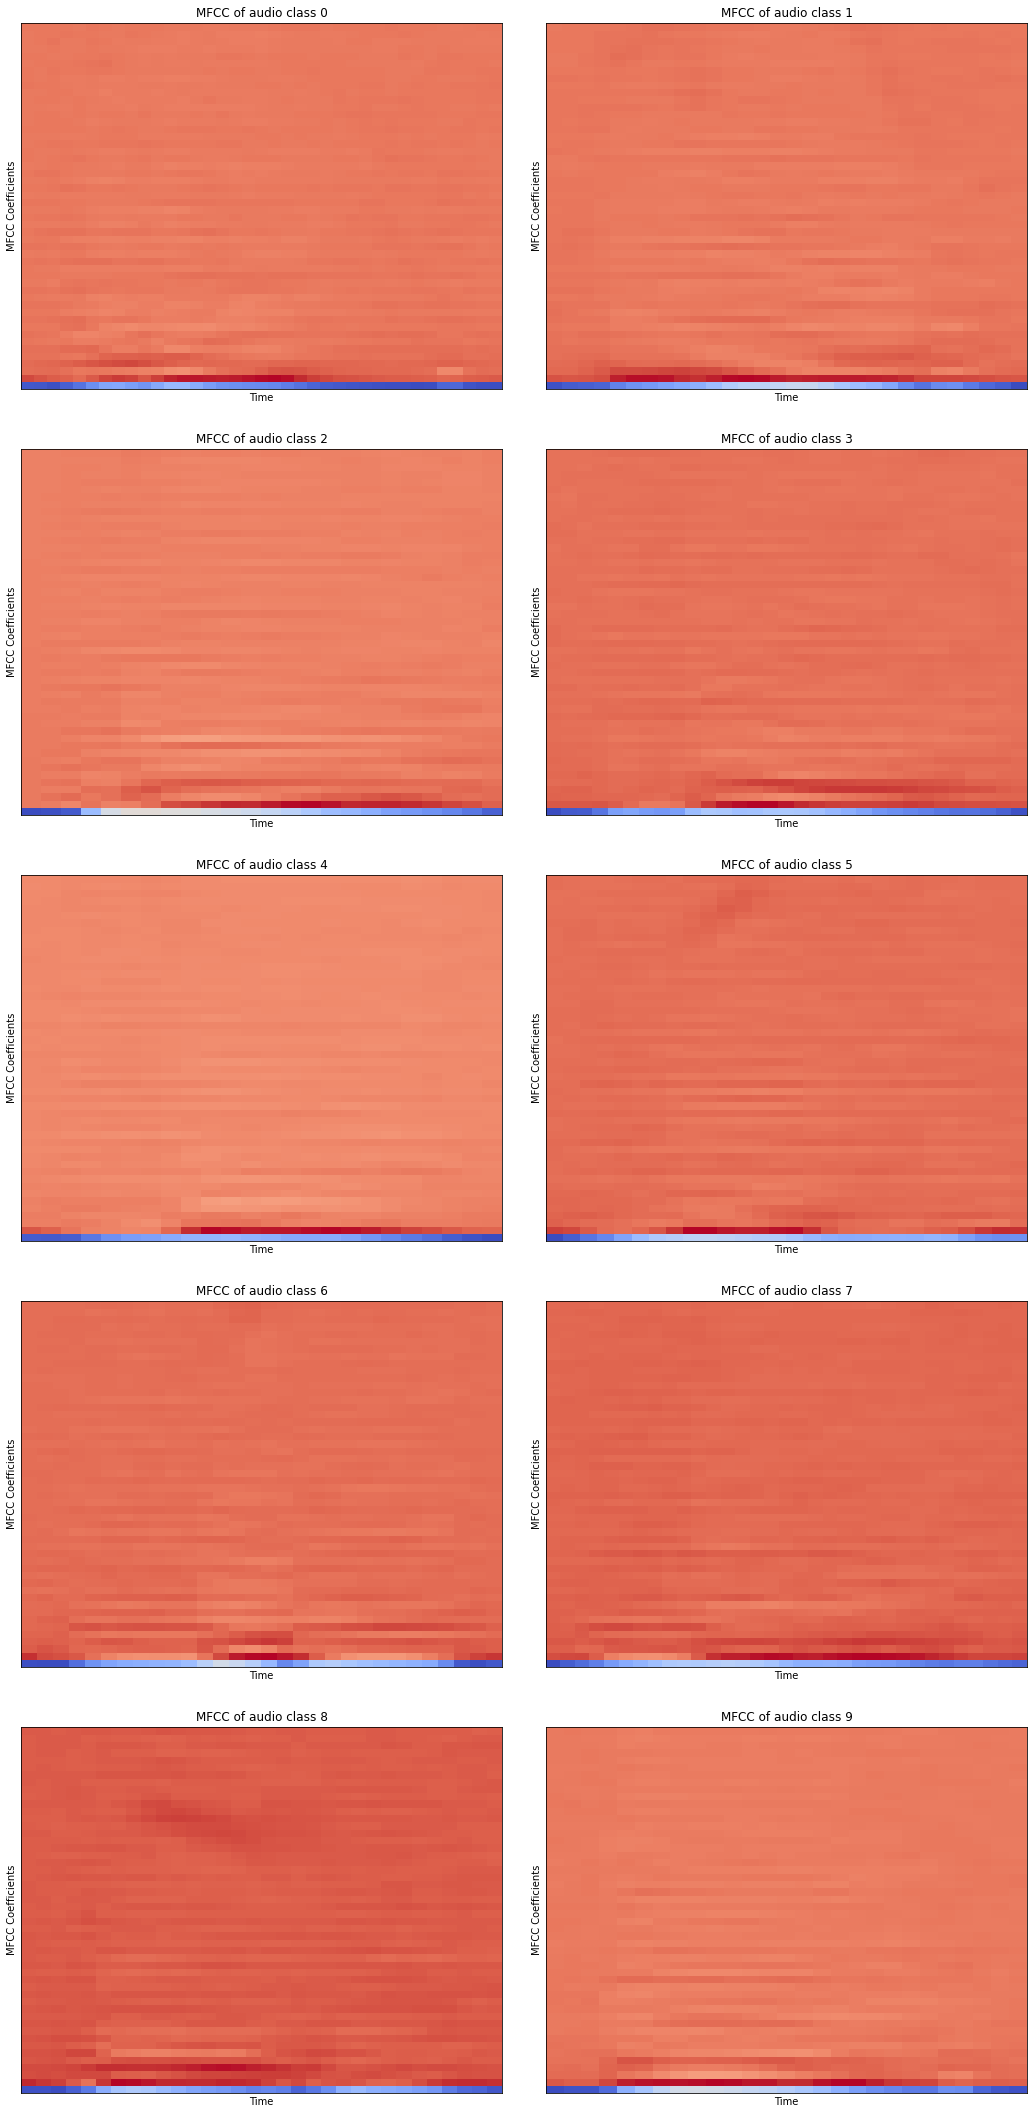

In [17]:
fig,ax = plt.subplots(5,2,figsize=(15,30))
row = 0
column = 0

for digit in range(10):  
    # Get Audio of different class(0-9)
    audio_data,sample_rate = get_audio_raw(digit)
    
    # Extract Its MFCC
    mfcc = extract_features_without_scaling(audio_data,sample_rate)
    
    # Display the plots and its title
    ax[row,column].set_title(f"MFCC of audio class {digit}")
    librosa.display.specshow(mfcc,sr=22050,ax=ax[row,column])
    
    # Set X-labels and y-labels
    ax[row,column].set_xlabel("Time")
    ax[row,column].set_ylabel("MFCC Coefficients")
    
    # Conditions for positioning of the plots
    if column == 1:
        column = 0
        row += 1
    else:
        column+=1
        
    
plt.tight_layout(pad=3)   
plt.show();

In [18]:
# Import Train Test Split
from sklearn.model_selection import train_test_split
# Seperate the audio and its class as X and Y
X = np.array(dataset['features'].to_list())
Y = np.array(dataset['class'].to_list())

# Create train set and test set
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.75,shuffle=True,random_state=8)

In [25]:
# Crete a Sequential Object
model = Sequential()
model.add(Dense(100,input_shape=(40,),activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 25,310
Trainable params: 25,310
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.fit(X_train,
          Y_train,
          validation_data=(X_test,Y_test),
          epochs=100,
          batch_size=128,
          verbose=1)

Epoch 1/100
176/176 [==============================] - 1s 3ms/step - loss: 3.1094e-04 - accuracy: 1.0000 - val_loss: 0.1446 - val_accuracy: 0.9828
Epoch 2/100
176/176 [==============================] - 1s 4ms/step - loss: 1.0951e-04 - accuracy: 1.0000 - val_loss: 0.1446 - val_accuracy: 0.9829
Epoch 3/100
176/176 [==============================] - 1s 4ms/step - loss: 8.8569e-05 - accuracy: 1.0000 - val_loss: 0.1445 - val_accuracy: 0.9829
Epoch 4/100
176/176 [==============================] - 1s 4ms/step - loss: 7.5838e-05 - accuracy: 1.0000 - val_loss: 0.1446 - val_accuracy: 0.9831
Epoch 5/100
176/176 [==============================] - 1s 3ms/step - loss: 6.6959e-05 - accuracy: 1.0000 - val_loss: 0.1448 - val_accuracy: 0.9828
Epoch 6/100
176/176 [==============================] - 1s 4ms/step - loss: 5.9754e-05 - accuracy: 1.0000 - val_loss: 0.1447 - val_accuracy: 0.9831
Epoch 7/100
176/176 [==============================] - 0s 3ms/step - loss: 5.3981e-05 - accuracy: 1.0000 - val_loss: 0

176/176 [==============================] - 1s 3ms/step - loss: 9.2933e-07 - accuracy: 1.0000 - val_loss: 0.1630 - val_accuracy: 0.9827
Epoch 57/100
176/176 [==============================] - 1s 3ms/step - loss: 8.5905e-07 - accuracy: 1.0000 - val_loss: 0.1632 - val_accuracy: 0.9827
Epoch 58/100
176/176 [==============================] - 1s 3ms/step - loss: 7.8612e-07 - accuracy: 1.0000 - val_loss: 0.1643 - val_accuracy: 0.9825
Epoch 59/100
176/176 [==============================] - 1s 3ms/step - loss: 7.2743e-07 - accuracy: 1.0000 - val_loss: 0.1654 - val_accuracy: 0.9827
Epoch 60/100
176/176 [==============================] - 1s 3ms/step - loss: 6.6431e-07 - accuracy: 1.0000 - val_loss: 0.1658 - val_accuracy: 0.9827
Epoch 61/100
176/176 [==============================] - 1s 3ms/step - loss: 6.0972e-07 - accuracy: 1.0000 - val_loss: 0.1664 - val_accuracy: 0.9827
Epoch 62/100
176/176 [==============================] - 1s 3ms/step - loss: 5.6572e-07 - accuracy: 1.0000 - val_loss: 0.1672 

In [40]:
# Make predictions on test set
Y_pred = model.predict(X_test)
Y_pred = [np.argmax(i) for i in Y_pred]

In [41]:
# Print the metrics
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       773
           1       0.96      0.98      0.97       795
           2       0.99      0.98      0.98       758
           3       0.97      0.98      0.98       745
           4       0.99      0.99      0.99       754
           5       0.99      0.99      0.99       736
           6       1.00      1.00      1.00       731
           7       0.98      0.99      0.98       747
           8       0.99      0.96      0.98       721
           9       0.98      0.97      0.97       740

    accuracy                           0.98      7500
   macro avg       0.98      0.98      0.98      7500
weighted avg       0.98      0.98      0.98      7500



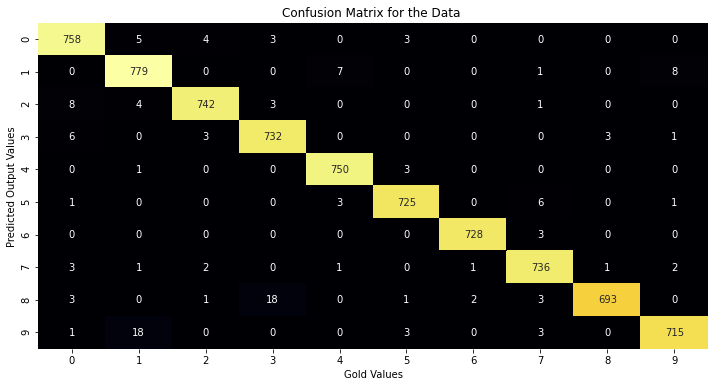

In [43]:
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix for the Data ")

con_matrix = confusion_matrix([int(x) for x in Y_test],Y_pred)
sns.heatmap(con_matrix, annot=True, cmap="inferno", fmt='g', cbar=False)
plt.xlabel("Gold Values")
plt.ylabel("Predicted Output Values")
plt.show();